In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt 
headers = ['age','sex','chest_pain','blood_p','serum','blood_s','electro','max_heart', 'angina','oldpeak','slope','vessel','thal','normal']
df = pd.read_csv("heart.dat", header=None, names=headers, sep=' ')
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['chest_pain'][df['chest_pain'] == 1] = 'typical angina'
df['chest_pain'][df['chest_pain'] == 2] = 'atypical angina'
df['chest_pain'][df['chest_pain'] == 3] = 'non-anginal pain'
df['chest_pain'][df['chest_pain'] == 4] = 'asymptomatic'
df['blood_s'][df['blood_s'] == 0] = 'lower than 120mg/ml'
df['blood_s'][df['blood_s'] == 1] = 'greater than 120mg/ml'
df['electro'][df['electro'] == 0] = 'normal'
df['electro'][df['electro'] == 1] = 'ST-T wave abnormality'
df['electro'][df['electro'] == 2] = 'left ventricular hypertrophy'
df['angina'][df['angina'] == 0] = 'no'
df['angina'][df['angina'] == 1] = 'yes'
df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'
df['thal'][df['thal'] == 3] = 'normal'
df['thal'][df['thal'] == 6] = 'fixed defect'
df['thal'][df['thal'] == 7] = 'reversable defect'

ImportError: Can't determine version for bottleneck

In [ ]:
df.head()

In [3]:
df.info()

NameError: name 'df' is not defined

In [15]:
df.describe()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,0.670370,1.444444
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.943896,0.497827
min,29.000000,94.000000,126.000000,71.000000,0.00000,0.000000,1.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,0.000000,1.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,0.000000,1.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,3.000000,2.000000


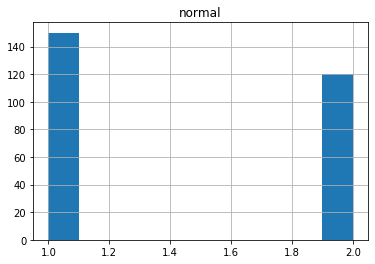

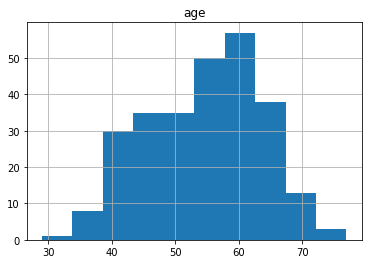

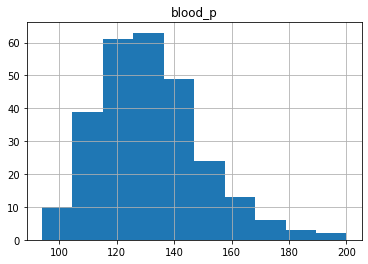

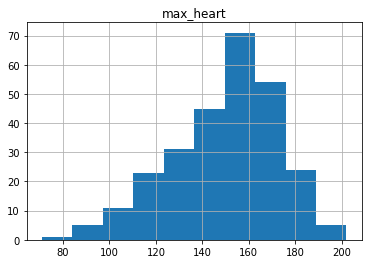

In [16]:
h0=df.hist(column="normal")
h1=df.hist(column="age")
h2=df.hist(column="blood_p")
h3=df.hist(column="max_heart")

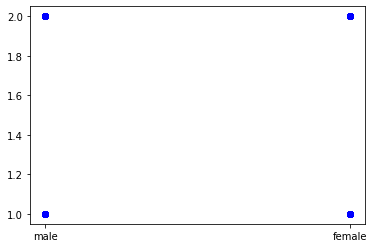

In [17]:
x= df.sex
y=df.normal
plt.plot(x, y,"ob")

In [18]:
df = pd.get_dummies(df)

In [19]:
df.head()

,age,blood_p,serum,max_heart,oldpeak,vessel,normal,sex_female,sex_male,chest_pain_asymptomatic,...,electro_left ventricular hypertrophy,electro_normal,angina_no,angina_yes,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,70.0,130.0,322.0,109.0,2.4,3.0,2,0,1,1,...,1,0,1,0,0,1,0,0,1,0
1,67.0,115.0,564.0,160.0,1.6,0.0,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
2,57.0,124.0,261.0,141.0,0.3,0.0,2,0,1,0,...,0,1,1,0,0,0,1,0,0,1
3,64.0,128.0,263.0,105.0,0.2,1.0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1
4,74.0,120.0,269.0,121.0,0.2,1.0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0


In [20]:
class_label = df.pop("normal").values -1
reg_label = df.pop("blood_p").values
X_data = df.values

In [66]:
class_label = df.pop("normal").values -1
reg_label = df.pop("blood_p").values
X_data = df.values

In [23]:
X_data

array([[ 70., 322., 109., ...,   0.,   1.,   0.],
       [ 67., 564., 160., ...,   0.,   0.,   1.],
       [ 57., 261., 141., ...,   0.,   0.,   1.],
       ...,
       [ 56., 294., 153., ...,   0.,   1.,   0.],
       [ 57., 192., 148., ...,   1.,   0.,   0.],
       [ 67., 286., 108., ...,   0.,   1.,   0.]])

In [26]:
np.random.seed(0)
mask_test = np.random.rand(X_data.shape[0]) < 0.30
mask_test

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
        True,  True, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True, False,  True,  True, False,  True, False,
        True, False,  True, False, False,  True, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

In [25]:
X_train = X_data[~mask_test] 
X_test = X_data[mask_test]
reg_label_train = reg_label[~mask_test] 
reg_label_test = reg_label[mask_test]
class_label_train = class_label[~mask_test] 
class_label_test = class_label[mask_test]
print("Train: ",X_train.shape)
print("Test: ",X_test.shape)

Train:  (184, 24)
Test:  (86, 24)


In [27]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
Xstd_train = std.transform(X_train) 
Xstd_test = std.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(Xstd_train, reg_label_train)
reg_pred_train = model.predict(Xstd_train)
reg_pred_test = model.predict(Xstd_test)

In [74]:
reg_pred_test

array([133.99937134, 134.43687134, 125.87437134, 142.99937134,
       125.74937134, 126.81187134, 127.31187134, 135.49937134,
       115.56187134, 119.43687134, 130.56187134, 129.74937134,
       123.56187134, 136.24937134, 137.87437134, 131.24937134,
       135.24937134, 139.93687134, 161.62437134, 144.37437134,
       120.06187134, 121.24937134, 126.62437134, 120.18687134,
       118.99937134, 130.31187134, 135.87437134, 125.74937134,
       155.12437134, 132.87437134, 125.99937134, 122.74937134,
       128.99937134, 133.93687134, 129.37437134, 134.74937134,
       126.37437134, 139.06187134, 130.62437134, 138.99937134,
       119.31187134, 138.56187134, 121.49937134, 117.93687134,
       131.43687134, 130.99937134, 142.68687134, 131.18687134,
       146.12437134, 132.87437134, 129.74937134, 135.87437134,
       139.62437134, 119.49937134, 137.37437134, 126.87437134,
       143.49937134, 134.74937134, 133.87437134, 128.24937134,
       141.81187134, 133.99937134, 130.74937134, 144.93

In [75]:
X_test

array([[ 57., 303., 159., ...,   0.,   1.,   0.],
       [ 71., 149., 125., ...,   0.,   1.,   0.],
       [ 46., 311., 120., ...,   0.,   0.,   1.],
       ...,
       [ 58., 284., 160., ...,   0.,   1.,   0.],
       [ 44., 263., 173., ...,   0.,   0.,   1.],
       [ 57., 192., 148., ...,   1.,   0.,   0.]])

In [79]:
af=pd.DataFrame({'Actual': reg_label_test.flatten(), 'Predicted': reg_pred_test.flatten()})
af

,Actual,Predicted
0,128.0,133.999371
1,112.0,134.436871
2,140.0,125.874371
3,132.0,142.999371
4,138.0,125.749371
5,128.0,126.811871
6,144.0,127.311871
7,101.0,135.499371
8,118.0,115.561871
9,110.0,119.436871


In [80]:
df2=pd.DataFrame({'Actual': reg_label_train.flatten(), 'Predicted': reg_pred_train.flatten()})
df2

,Actual,Predicted
0,130.0,134.124371
1,115.0,154.311871
2,124.0,134.749371
3,128.0,129.249371
4,120.0,142.249371
5,120.0,132.249371
6,130.0,138.561871
7,110.0,131.374371
8,140.0,132.561871
9,150.0,148.561871


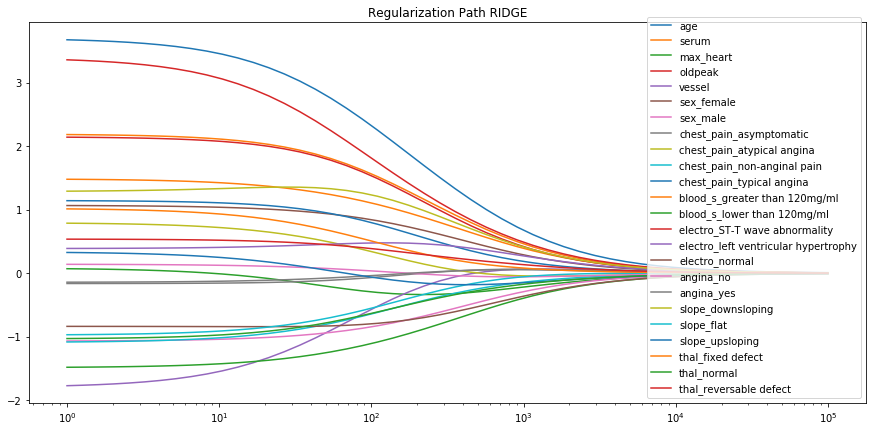

In [29]:
from sklearn.linear_model import Ridge
alphas_ = np.logspace(5,0, base=10)
coefs = []
model = Ridge(fit_intercept=True, solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
import matplotlib.pyplot as plt
names_regressors = df.columns
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()

[1.00000000e+02 8.28642773e+01 6.86648845e+01 5.68986603e+01
 4.71486636e+01 3.90693994e+01 3.23745754e+01 2.68269580e+01
 2.22299648e+01 1.84206997e+01 1.52641797e+01 1.26485522e+01
 1.04811313e+01 8.68511374e+00 7.19685673e+00 5.96362332e+00
 4.94171336e+00 4.09491506e+00 3.39322177e+00 2.81176870e+00
 2.32995181e+00 1.93069773e+00 1.59985872e+00 1.32571137e+00
 1.09854114e+00 9.10298178e-01 7.54312006e-01 6.25055193e-01
 5.17947468e-01 4.29193426e-01 3.55648031e-01 2.94705170e-01
 2.44205309e-01 2.02358965e-01 1.67683294e-01 1.38949549e-01
 1.15139540e-01 9.54095476e-02 7.90604321e-02 6.55128557e-02
 5.42867544e-02 4.49843267e-02 3.72759372e-02 3.08884360e-02
 2.55954792e-02 2.12095089e-02 1.75751062e-02 1.45634848e-02
 1.20679264e-02 1.00000000e-02]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.14639031 0.99318861
 1.67382602 2.18910548 2.46112618 2.60156553 2.7164

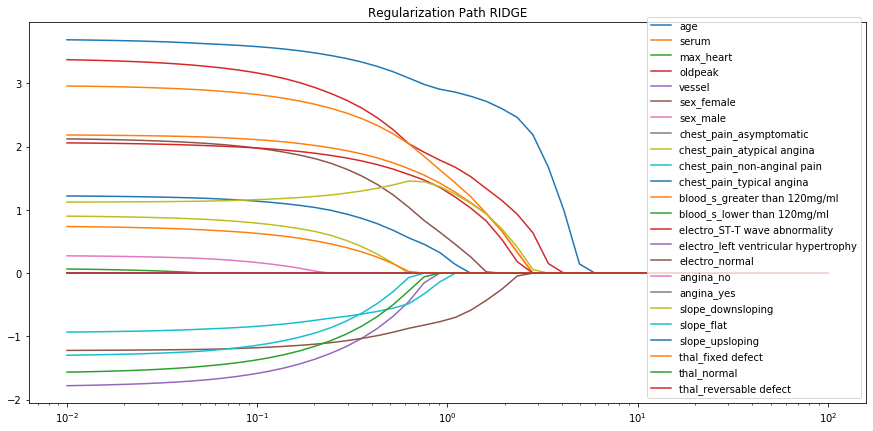

In [49]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)

for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xstd_train, reg_label_train)
    coefs.append(model.coef_)
names_regressors = df.columns
print (alphas_)
print (np.squeeze(coefs).T[0])
print (names_regressors[0])
plt.figure(figsize=(15,7))
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
plt.xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend(loc='lower right')
plt.show()

In [37]:
from ipywidgets import interactive
from sklearn.metrics import mean_absolute_error, mean_squared_error
def train_model(param):
    model = Lasso(fit_intercept=True) #define the model (Ridge and Lasso)
    model2 = Ridge(fit_intercept=True)
    A = 10**(param)
    print("Param alpha= ",A)
    model.set_params(alpha=A)
    model2.set_params(alpha=A)
    model.fit(Xstd_train, reg_label_train)
    model2.fit(Xstd_train, reg_label_train)
    print('LASSO')
    print("MSE train: ", mean_squared_error(reg_label_train, model.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model.predict(Xstd_test) ))
    print('RIDGE')
    print("MSE train: ", mean_squared_error(reg_label_train, model2.predict(Xstd_train) ))
    print("MSE test: ", mean_squared_error(reg_label_test, model2.predict(Xstd_test) ))
p_min = -10 #define your range
p_max = 10 #define your range
interactive(train_model, param=(p_min,p_max))

interactive(children=(IntSlider(value=0, description='param', max=10, min=-10), Output()), _dom_classes=('widg…

In [59]:
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = []
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LinearRegression(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train =  predictions_train - y
            error_candidate =  np.mean(np.power(residuals_train, 2))
            score_candidates.append((error_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print ("selected = %s ..."%names_x[best_candidate])
        print ("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
    return selected
features_fss = fss(Xstd_train, reg_label_train, names_regressors)
need_feat = features_fss[:5]
print (need_feat)

selected = age ...
totalvars=1, mse = 300.979348
selected = slope_downsloping ...
totalvars=2, mse = 290.783078
selected = electro_ST-T wave abnormality ...
totalvars=3, mse = 285.223146
selected = serum ...
totalvars=4, mse = 280.086070
selected = blood_s_greater than 120mg/ml ...
totalvars=5, mse = 275.860723
selected = oldpeak ...
totalvars=6, mse = 271.731524
selected = vessel ...
totalvars=7, mse = 269.449063
selected = chest_pain_non-anginal pain ...
totalvars=8, mse = 267.406266
selected = sex_female ...
totalvars=9, mse = 265.438934
selected = electro_normal ...
totalvars=10, mse = 264.169598
selected = chest_pain_asymptomatic ...
totalvars=11, mse = 263.060620
selected = thal_normal ...
totalvars=12, mse = 261.364799
selected = slope_flat ...
totalvars=13, mse = 260.364328
selected = thal_fixed defect ...
totalvars=14, mse = 259.919532
selected = chest_pain_atypical angina ...
totalvars=15, mse = 259.704707
selected = angina_no ...
totalvars=16, mse = 259.633150
selected = max

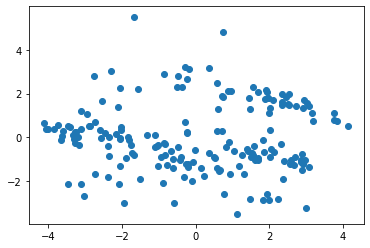

In [60]:
from sklearn.decomposition import PCA
d = 2
pca_model = PCA(n_components=d)
pca_model.fit(Xstd_train)
X_pca_train = pca_model.transform(Xstd_train)
X_pca_test = pca_model.transform(Xstd_test)
plt.scatter(X_pca_train[:,0], X_pca_train[:,1])
plt.show()